In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("../Malaria"))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

['.DS_Store', 'Parasitized', 'Malaria.ipynb', 'Uninfected', '.ipynb_checkpoints']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#lets make sure we are reading the right files

parasitized_data = os.listdir('../Malaria/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../Malaria/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_105018_cell_150.png', 'C189P150ThinF_IMG_20151203_142224_cell_84.png', 'C91P52ThinF_IMG_20150821_123116_cell_189.png', 'C84P45ThinF_IMG_20150818_101226_cell_98.png', 'C144P105ThinF_IMG_20151015_163432_cell_310.png', 'C136P97ThinF_IMG_20151005_141803_cell_131.png', 'C65P26N_ThinF_IMG_20150818_154050_cell_177.png', 'C60P21thinF_IMG_20150804_105034_cell_105.png', 'C109P70ThinF_IMG_20150930_103811_cell_159.png', 'C176P137NThinF_IMG_20151201_122708_cell_126.png']


['C13NThinF_IMG_20150614_131318_cell_179.png', 'C205ThinF_IMG_20151106_152003_cell_21.png', 'C230ThinF_IMG_20151112_150647_cell_1.png', 'C134P95ThinF_IMG_20151005_121834_cell_65.png', 'C141P102ThinF_IMG_20151005_214836_cell_132.png', 'C167P128ReThinF_IMG_20151201_105559_cell_61.png', 'C218ThinF_IMG_20151106_144337_cell_57.png', 'C182P143NThinF_IMG_20151201_171950_cell_93.png', 'C181P142ThinF_IMG_20151127_160616_cell_54.png', 'C142P103ThinF_IMG_20151005_223257_cell_18.png']


## Let's take a look at our nasty parasite aka Malaria

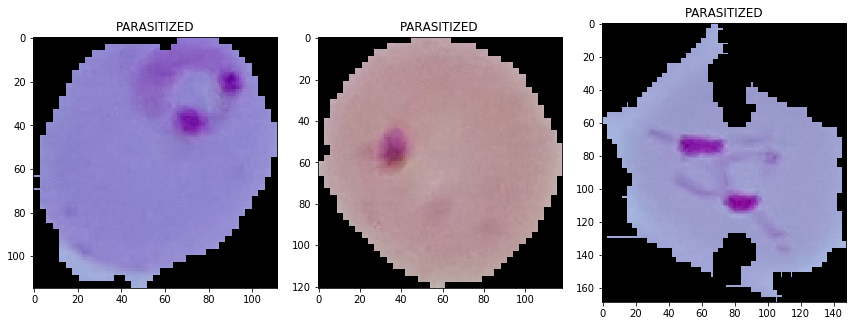

In [4]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread('../Malaria/Parasitized/' + parasitized_data[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('PARASITIZED')
    plt.tight_layout()
plt.show()


## For comparison, healthy cells

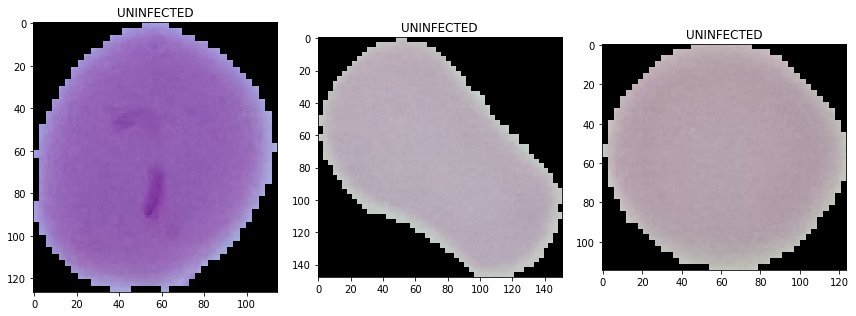

In [5]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread('../Malaria/Uninfected/' + uninfected_data[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('UNINFECTED')
    plt.tight_layout()
plt.show()


## We can see the differences here:
It looks like healthy cells are relatively clear while the infected cells have a spotting qaulity to them.

Now that we know the diffrence let's classify these data

'1' = infected

'0' = healthy

In [6]:
data = []
labels = []

#Setting infected data to '1'
for image in parasitized_data:
    try:
        img_read = plt.imread('../Malaria/Parasitized/' + image) #read images
        img_resize = cv2.resize(img_read, (50, 50)) #resize 50x50 all the same shape
        img_array = img_to_array(img_resize) #convert into arrays
        data.append(img_array) 
        labels.append(1) #add label
    except:
        None

#Setting our uninfected data to '0'
for image in uninfected_data:
    try:
        img_read=plt.imread('../Malaria/Uninfected/' + image)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0) #add our label
    except:
        None

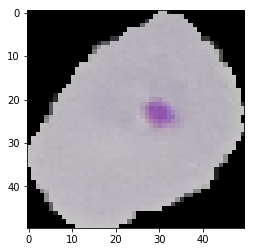

In [7]:
#Lets check photo for size
plt.imshow(data[9]) 
plt.show() #can see its 50x50

In [8]:
#Convert to arrays instead of lists

image_data = np.array(data)
labels = np.array(labels)

In [9]:
#Order our data and then shuffle it to ensure randomness

idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx] #training (x)
labels = labels[idx] #classifier (y)

In [10]:
#Time to split data into train / test sets
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(image_data, labels, 
                                                    test_size = 0.15, 
                                                    random_state = 42)


In [11]:
#One-hot encode target column

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_test[0]


array([1., 0.], dtype=float32)

In [12]:
#Data Shapes

print(x_train.shape) #Image training 
print(x_test.shape) #Image testing

print(y_train.shape) #Label training
print(y_test.shape) #Label Testing

(23424, 50, 50, 3)
(4134, 50, 50, 3)
(23424, 2)
(4134, 2)


## Now that we have training / testing values let's build a CNN model

In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers


In [14]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

#Flatten connects convulation later with our dense later
model.add(Flatten())

model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#compile model using accuracy to measure model performance

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train the model

m = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Train on 23424 samples, validate on 4134 samples
Epoch 1/10
23424/23424 [==============================] - 159s 7ms/step - loss: 0.6716 - acc: 0.5962 - val_loss: 0.6487 - val_acc: 0.6258
Epoch 2/10
23424/23424 [==============================] - 156s 7ms/step - loss: 0.6182 - acc: 0.6613 - val_loss: 0.6397 - val_acc: 0.6350
Epoch 3/10
23424/23424 [==============================] - 154s 7ms/step - loss: 0.5563 - acc: 0.7199 - val_loss: 0.5619 - val_acc: 0.7010
Epoch 4/10
23424/23424 [==============================] - 155s 7ms/step - loss: 0.2935 - acc: 0.8942 - val_loss: 0.2612 - val_acc: 0.8994
Epoch 5/10
23424/23424 [==============================] - 155s 7ms/step - loss: 0.1631 - acc: 0.9462 - val_loss: 0.2306 - val_acc: 0.9110
Epoch 6/10
23424/23424 [==============================] - 157s 7ms/step - loss: 0.1176 - acc: 0.9625 - val_loss: 0.2404 - val_acc: 0.9199
Epoch 7/10
23424/23424 [==============================] - 156s 7ms/step - l

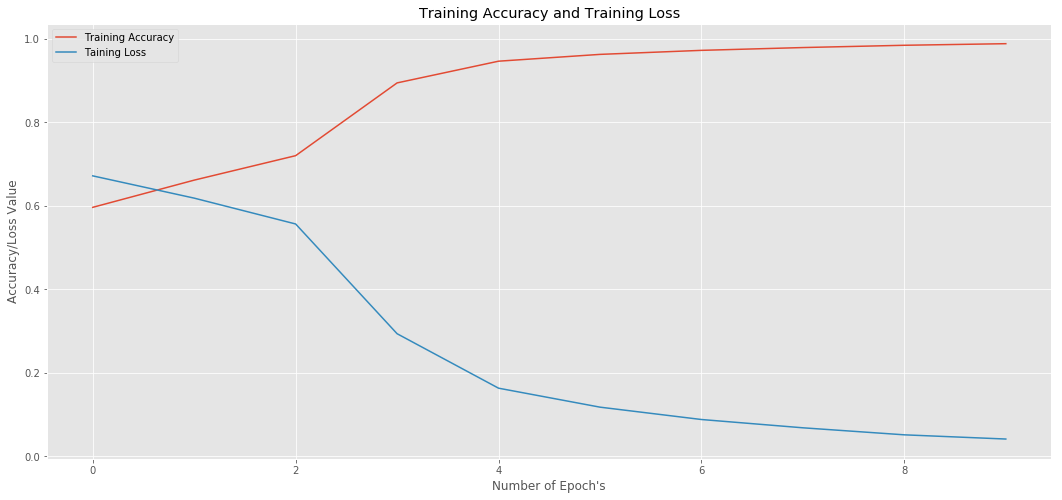

In [20]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.figure(figsize = (18,8))

plt.plot(range(10), m.history['acc'], label = 'Training Accuracy')
plt.plot(range(10), m.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [25]:
predict = model.evaluate(x_test, y_test)

4134/4134 [==============================] - 9s 2ms/step


In [26]:
print(f'LOSS : {predict[0]}')
print(f'ACCURACY : {predict[1]}')

LOSS : 0.3267560165761157
ACCURACY : 0.9216255442670537


## We have a validation accuracy of 92%
Not too shabby